In [2]:
!pip install tensorflow
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
IMG_SIZE = 150
data_dir = "/content/drive/MyDrive/brain_tumor_dataset"

def load_data(data_dir):
    data = []
    labels = []
    for label in ["yes", "no"]:
        path = os.path.join(data_dir, label)
        class_num = 1 if label == "yes" else 0
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append(resized_array)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(labels)

data, labels = load_data(data_dir)

data = data / 255.0  # Normalize pixel values
data = data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Add a channel dimension


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [6]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = create_model()


In [7]:
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))


Epoch 1/20
7/7 [==============================] - 16s 2s/step - loss: 0.6389 - accuracy: 0.6139 - val_loss: 0.5135 - val_accuracy: 0.8039
Epoch 2/20
7/7 [==============================] - 13s 2s/step - loss: 0.5311 - accuracy: 0.7673 - val_loss: 0.4612 - val_accuracy: 0.8039
Epoch 3/20
7/7 [==============================] - 10s 2s/step - loss: 0.4898 - accuracy: 0.7822 - val_loss: 0.4875 - val_accuracy: 0.8039
Epoch 4/20
7/7 [==============================] - 11s 2s/step - loss: 0.4592 - accuracy: 0.8020 - val_loss: 0.4288 - val_accuracy: 0.8039
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.4257 - accuracy: 0.8267 - val_loss: 0.4519 - val_accuracy: 0.7843
Epoch 6/20
7/7 [==============================] - 10s 2s/step - loss: 0.3922 - accuracy: 0.8267 - val_loss: 0.4062 - val_accuracy: 0.8235
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.3727 - accuracy: 0.8465 - val_loss: 0.4142 - val_accuracy: 0.8039
Epoch 8/20
7/7 [===================

1/1 [==============================] - 0s 32ms/step
Predicted label: no
True label: no


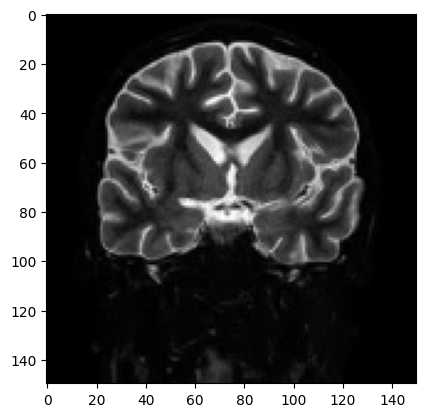

In [13]:
def predict_random_image(model, X_test, y_test):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx]
    label = y_test[idx]

    img_exp = np.expand_dims(img, axis=0)
    prediction = model.predict(img_exp)

    pred_label = "yes" if prediction > 0.5 else "no"
    true_label = "yes" if label == 1 else "no"

    print(f"Predicted label: {pred_label}")
    print(f"True label: {true_label}")

    # Show the image
    import matplotlib.pyplot as plt
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

predict_random_image(model, X_test, y_test)
